In [6]:
import numpy as np
from fredapi import Fred

get API Key here https://fred.stlouisfed.org/docs/api/api_key.html

In [8]:
API_KEY="81944ec330e8dfe12266c39dddd3a229" 
fred = Fred(API_KEY)

In [156]:
us10 = fred.get_series('DGS10')
us10

1962-01-02    4.06
1962-01-03    4.03
1962-01-04    3.99
1962-01-05    4.02
1962-01-08    4.03
              ... 
2022-03-29    2.41
2022-03-30    2.35
2022-03-31    2.32
2022-04-01    2.38
2022-04-04    2.42
Length: 15720, dtype: float64

### 1. 무위험 이자 수익률 계산
- year 과 month 를 기준으로 평균값을 구해서 정리, 최근 1년치
- 10년만기 국채의 년평균 이율을 계산한다 

In [157]:
us10 = us10.groupby([us10.index.year, us10.index.month]).mean().iloc[-4:]
us10

2022  1    1.764000
      2    1.934211
      3    2.127826
      4    2.400000
dtype: float64

In [158]:
risk_free_rate = us10.mean() / 100

### 2. 베타값 계산

In [ ]:
!pip install yahoo_fin --upgrade

In [40]:
from yahoo_fin.stock_info import *
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [159]:
# 5년전 
start = datetime.now() - relativedelta(years=5)

In [160]:
# SNP 를 월단위로 끊어서 5년치를 들고와라
snp = get_data("^GSPC",start_date=start,interval="1mo")['adjclose'].dropna()
snp

2017-05-01    2411.800049
2017-06-01    2423.409912
2017-07-01    2470.300049
2017-08-01    2471.649902
2017-09-01    2519.360107
                 ...     
2022-01-01    4515.549805
2022-02-01    4373.939941
2022-03-01    4530.410156
2022-04-01    4525.120117
2022-04-06    4463.339844
Name: adjclose, Length: 61, dtype: float64

In [161]:
# SNP 년,월 단위로 그룹지어라
snp = snp.groupby([snp.index.year, snp.index.month]).first()
snp

2017  5     2411.800049
      6     2423.409912
      7     2470.300049
      8     2471.649902
      9     2519.360107
      10    2575.260010
      11    2647.580078
      12    2673.610107
2018  1     2823.810059
      2     2713.830078
      3     2640.870117
      4     2648.050049
      5     2705.270020
      6     2718.370117
      7     2816.290039
      8     2901.520020
      9     2913.979980
      10    2711.739990
      11    2760.169922
      12    2506.850098
2019  1     2704.100098
      2     2784.489990
      3     2834.399902
      4     2945.830078
      5     2752.060059
      6     2941.760010
      7     2980.379883
      8     2926.459961
      9     2976.739990
      10    3037.560059
      11    3140.979980
      12    3230.780029
2020  1     3225.520020
      2     2954.219971
      3     2584.590088
      4     2912.429932
      5     3044.310059
      6     3100.290039
      7     3271.120117
      8     3500.310059
      9     3363.000000
      10    3269

In [162]:
# SNP의 수익률
snp_return = snp.pct_change().dropna()
snp_return

2017  6     0.004814
      7     0.019349
      8     0.000546
      9     0.019303
      10    0.022188
      11    0.028083
      12    0.009832
2018  1     0.056179
      2    -0.038947
      3    -0.026884
      4     0.002719
      5     0.021608
      6     0.004842
      7     0.036022
      8     0.030263
      9     0.004294
      10   -0.069403
      11    0.017859
      12   -0.091777
2019  1     0.078684
      2     0.029729
      3     0.017924
      4     0.039313
      5    -0.065778
      6     0.068930
      7     0.013128
      8    -0.018092
      9     0.017181
      10    0.020432
      11    0.034047
      12    0.028590
2020  1    -0.001628
      2    -0.084110
      3    -0.125119
      4     0.126844
      5     0.045282
      6     0.018388
      7     0.055101
      8     0.070065
      9    -0.039228
      10   -0.027666
      11    0.107546
      12    0.037121
2021  1    -0.011137
      2     0.026091
      3     0.042439
      4     0.052425
      5     0

In [163]:
# 분석기업인 인모드도 수익률을 SNP와 같은 방법으로 계산 
INMD = get_data("INMD",start_date=start,interval="1mo")['adjclose'].dropna()
INMD = INMD.groupby([INMD.index.year, INMD.index.month]).first()
INMD_return = INMD.pct_change().dropna()

In [164]:
# 개월수를 인모드를 기준으로 맞춰줍니다
stocks = INMD_return.to_frame().join(snp_return.to_frame(),rsuffix='_snp')
stocks

adjclose  adjclose_snp
2019 10  0.430033      0.020432
     11  0.646944      0.034047
     12 -0.226214      0.028590
2020 1   0.105357     -0.001628
     2  -0.239788     -0.084110
     3  -0.347298     -0.125119
     4   0.210233      0.126844
     5   0.126441      0.045282
     6  -0.033777      0.018388
     7   0.142655      0.055101
     8  -0.022559      0.070065
     9   0.143851     -0.039228
     10  0.010503     -0.027666
     11  0.178337      0.107546
     12  0.102136      0.037121
2021 1   0.239680     -0.011137
     2   0.171594      0.026091
     3   0.049449      0.042439
     4   0.192898      0.052425
     5  -0.011236      0.005486
     6   0.109185      0.022214
     7   0.200570      0.022748
     8   0.151403      0.028990
     9   0.218291     -0.047569
     10  0.188335      0.069144
     11 -0.197804     -0.008334
     12 -0.071316      0.043613
2022 1  -0.316662     -0.052585
     2  -0.114866     -0.031360
     3  -0.135395      0.035773
     4  -0.039014     -0.001168

In [165]:
INMD = stocks.iloc[:,0].values
snp  = stocks.iloc[:,1].values

In [166]:
def cal_beta(m, s):
    n = len(m)
    cov = ((s - s.mean()) * (m - m.mean())).sum()
    var = np.sum((m - m.mean())**2)
    return cov/var

In [167]:
beta = cal_beta(snp,INMD)
beta

1.9349128751308342

### 3. 리스크 프리미엄 계산

In [168]:
# 10년 만기 미국채수익률, 어차피 SNP 10년치랑 매칭할꺼라 대충 들고옴
fred = Fred(API_KEY)
us10 = fred.get_series('DGS10')
us10 = us10.groupby([us10.index.year, us10.index.month]).mean()
us10_return = us10.pct_change().dropna()
us10_return


1962  2    -0.010712
      3    -0.026981
      4    -0.022250
      5     0.007972
      6     0.009142
              ...   
2021  12   -0.060596
2022  1     0.204096
      2     0.096491
      3     0.100101
      4     0.127912
Length: 723, dtype: float64

In [169]:
# snp 10년치 들고옴
start = datetime.now() - relativedelta(years=10)
snp = get_data("^GSPC",start_date=start,interval="1mo")['adjclose'].dropna()
snp = snp.groupby([snp.index.year, snp.index.month]).first()
snp_return = snp.pct_change().dropna()
snp_return


2012  6     0.039555
      7     0.012598
      8     0.019763
      9     0.024236
      10   -0.019789
              ...   
2021  12    0.043613
2022  1    -0.052585
      2    -0.031360
      3     0.035773
      4    -0.001168
Name: adjclose, Length: 119, dtype: float64

In [170]:
# snp에 index 맞추기
indices = snp_return.to_frame().join(us10_return.to_frame())
indices

adjclose         0
2012 6   0.039555 -0.100268
     7   0.012598 -0.058996
     8   0.019763  0.099298
     9   0.024236  0.026752
     10 -0.019789  0.013366
...           ...       ...
2021 12  0.043613 -0.060596
2022 1  -0.052585  0.204096
     2  -0.031360  0.096491
     3   0.035773  0.100101
     4  -0.001168  0.127912

[119 rows x 2 columns]

In [171]:
snp  = indices.iloc[:, 0].values
us10 = indices.iloc[:, 1].values 
RP   = snp.mean() - us10.mean()

In [172]:
CAPM =  risk_free_rate + beta*RP
CAPM

0.028309485366983526

In [225]:
start = datetime.now() - relativedelta(years=10)
INMD = get_data("INMD",start_date=start,interval="1mo")['adjclose'].dropna()
INMD = INMD.groupby([INMD.index.year,INMD.index.month]).mean().iloc[-39:,]
INMD_return = INMD.pct_change().dropna()
INMD_return

2019  10    0.430033
      11    0.646944
      12   -0.226214
2020  1     0.105357
      2    -0.239788
      3    -0.347298
      4     0.210233
      5     0.126441
      6    -0.033777
      7     0.142655
      8    -0.022559
      9     0.143851
      10    0.010503
      11    0.178337
      12    0.102136
2021  1     0.239680
      2     0.171594
      3     0.049449
      4     0.192898
      5    -0.011236
      6     0.109185
      7     0.200570
      8     0.151403
      9     0.218291
      10    0.188335
      11   -0.197804
      12   -0.071316
2022  1    -0.316662
      2    -0.114866
      3    -0.135395
      4    -0.044568
Name: adjclose, dtype: float64

In [226]:
date = [str(i) for i in INMD_return.index]

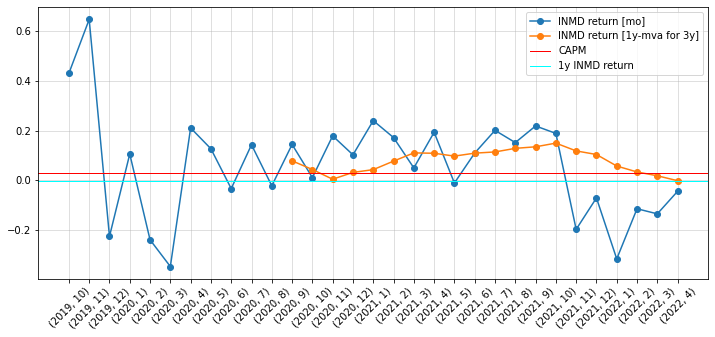

In [232]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5)) 
plt.plot(date, INMD_return,'o-',label='INMD return [mo]')
plt.plot(date, INMD_return.rolling(window=12).mean(),'o-',label='INMD return [1y-mva for 3y]')
plt.axhline(y=CAPM, color='r', linewidth=1,label='CAPM')
plt.axhline(y=INMD_1y_return, color='cyan', linewidth=1,label='1y INMD return')
plt.legend()
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.show()

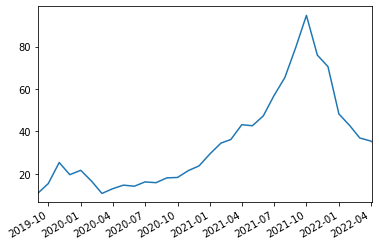

In [216]:
INMD = get_data("INMD",start_date=start,interval="1mo")['adjclose'].dropna()
INMD.plot()

In [220]:
start = datetime.now() - relativedelta(years=10)
INMD = get_data("INMD",start_date=start,interval="1mo")['adjclose'].dropna()
INMD = INMD.groupby([INMD.index.year,INMD.index.month]).mean().iloc[-13:,]
INMD_1y_return = INMD.pct_change().dropna().mean()
INMD_1y_return

-0.002084221910148676

In [223]:
print("CAPM: ",CAPM)
print("1y INMD retunr: ",INMD_1y_return)

CAPM:  0.028309485366983526
1y INMD retunr:  -0.002084221910148676
